# Spam classification. Natural Language Processing

In [1]:
# load  the text data with pandas
import pandas as pd
import numpy as np

In [4]:
# Data source: Kaggle

In [5]:
df = pd.read_csv('./spam.csv', sep=',', encoding='latin-1')

In [6]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [7]:
# Drop the unnessary columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Number of messages')

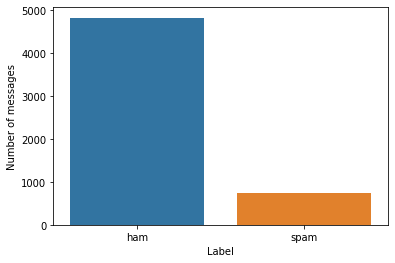

In [9]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.ylabel('Number of messages')

# Text cleaning

In [10]:
# import python NLP library
import re
import nltk
#import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [11]:
def clean_text(df):
    corpus = [] # empty list
    documents = df["v2"].values.tolist() # convert the message column v2 to list
    for text in documents:
        document = re.sub('[^a-zA-Z]', ' ', text) # remove everything (symbols, numbers, etc.) except alphabets
        document = document.lower() # covert text into lower case
        words= document.split() # split the document into words
        #words = word_tokenize(ldocument)
        stop_words = set(stopwords.words("english"))
        #stop_words.discard("not")
        PS = PorterStemmer() # instantiate the PorterStemmer
        words = [PS.stem(w) for w in words if not w in stop_words] # discard stop-words
        document = ' '.join(words) # join the words
        corpus.append(document)
    return corpus
    

In [12]:
corpus = clean_text(df)

# text after cleaning/ preprocessing

In [14]:
corpus[0:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

# Create the Bag of Words model

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
CV = CountVectorizer(max_features=3000) # select the maximum number of features to maximize the model accuracy
#CV = CountVectorizer(min_df=3)
X = CV.fit_transform(corpus).toarray() # dependent variable /feature

In [17]:
X.shape

(5572, 3000)

# Encoding the label (spam, ham )

In [33]:
y = pd.get_dummies(df["v1"])

In [34]:
y.head(3)

,ham,spam
0,1,0
1,1,0
2,0,1


In [20]:
y= y.iloc[:,1] # discard the redundant (ham) column

In [21]:
y.shape

(5572,)

# Train the model with a Naive Bayes Classifier

In [22]:
# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [24]:
#model = GaussianNB() # performance is worse in this case

In [25]:
model = MultinomialNB()

In [26]:
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
# Accuracy

In [28]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9865470852017937
0.9546827794561934
0.9575757575757575


In [29]:
# plot the confution matrix

In [30]:
from sklearn.metrics import plot_confusion_matrix

In [31]:
labels = ['ham', 'spam']

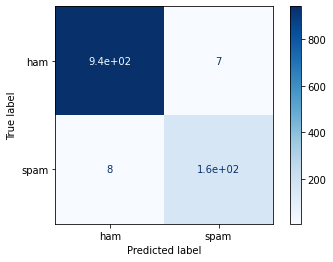

In [32]:
plot_confusion_matrix(model, X_test, y_test, display_labels=labels, cmap=plt.cm.Blues)  
plt.show() 